In [1]:
#| default_exp bigram

In [2]:
#| hide
from nbdev.showdoc import *

In [6]:
import torch
import matplotlib.pyplot as plt

Reading the names from the `names.txt` which contains the names in lowercase, separated by new line. Dataset is downloaded from `https://raw.githubusercontent.com/karpathy/makemore/master/names.txt`

In [7]:
# reading the data
words = open("../data/names.txt", "r").read().splitlines()

# Exploring
print(f"first 10 words{words[:10]}")
print(f"length of words: {len(words)}")
print(f"min word length {min(len(w) for (w) in words)} and max word length {max(len(w) for (w) in words)}")

first 10 words['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
length of words: 32033
min word length 2 and max word length 15


# Bigram
Bigram works with `2` words/characters at a time.

It uses the `previous` word/charachter to predict the `next` word/character. It is a simple model but it is a good starting point to understand the problem.

## 1- Bigram Dictionary

In [8]:
# getting the Bigrams
b = {}
for w in words:
    # add start and end tokens
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        # print(bigram)

        # use get instead of b[bigram] to avoid KeyError and set default to 0
        b[bigram] = b.get(bigram, 0) + 1

We initially used `<S>` and `<E>` as the start and end token respectively. But this approach is not useful enough because we can't have a character that starts before `<S>` so in the N lookup table there will be a complete row which have 0's in it. 

However instead of using `<S>` and `<E>`, we later substitue it for a single `.` character which indicates both the start and the end and make slight improvement in our code.

In [9]:
# print the most common bigrams in the data (sort by value)
sorted(b.items(), key = lambda kv: kv[1], reverse = True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

## 2- Bigram 2D Tensor

We are declaring a tensor which we will use to store the counts of our bigrams 

In [10]:
N = torch.zeros(28, 28, dtype = torch.int32)

Now we can't pass string data to our model we need to convert the characters to the number. Why characters? because it is a character level language model `Bigram` which means we will feed one character to our model and it will try to predict the next character in a sequence. We can also pass multiple character to our model but this is not the architecture of `Bigram`.

In [11]:
# make a list of characters (a -> z)
chars = sorted(list(set("".join(words))))

# make a dictionary of character to index
stoi = {ch: i for (i, ch) in enumerate(chars)}  # alphabet as key, integer as value
stoi["<S>"] = len(chars)
stoi["<E>"] = len(chars) + 1

# make a dictionary of index to character
itos = {i: ch for (ch, i) in stoi.items()} # integer as key, alphabet as value

Sample Bigram Language Model -- Now basically A bigram language model is a type of language model that predicts the probability of a word in a sequence based on the previous word. Same is true for the character. 

In the word case our vocabulary can be 17000 words or 100000 words based on the size of the problem, which in this case each word is assigned a index to be feed in to the model. But in the character level language model our vocabulary size is total number of character used in our whole dataset which are in this case 26 characters and we append `.` at the start and end of each name so total of we have 27 characters in our problem so our vocabulary size is 27 characters. 

In [12]:
# getting the Bigrams
for w in words:
    # add start and end tokens
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

Plotting Counts 

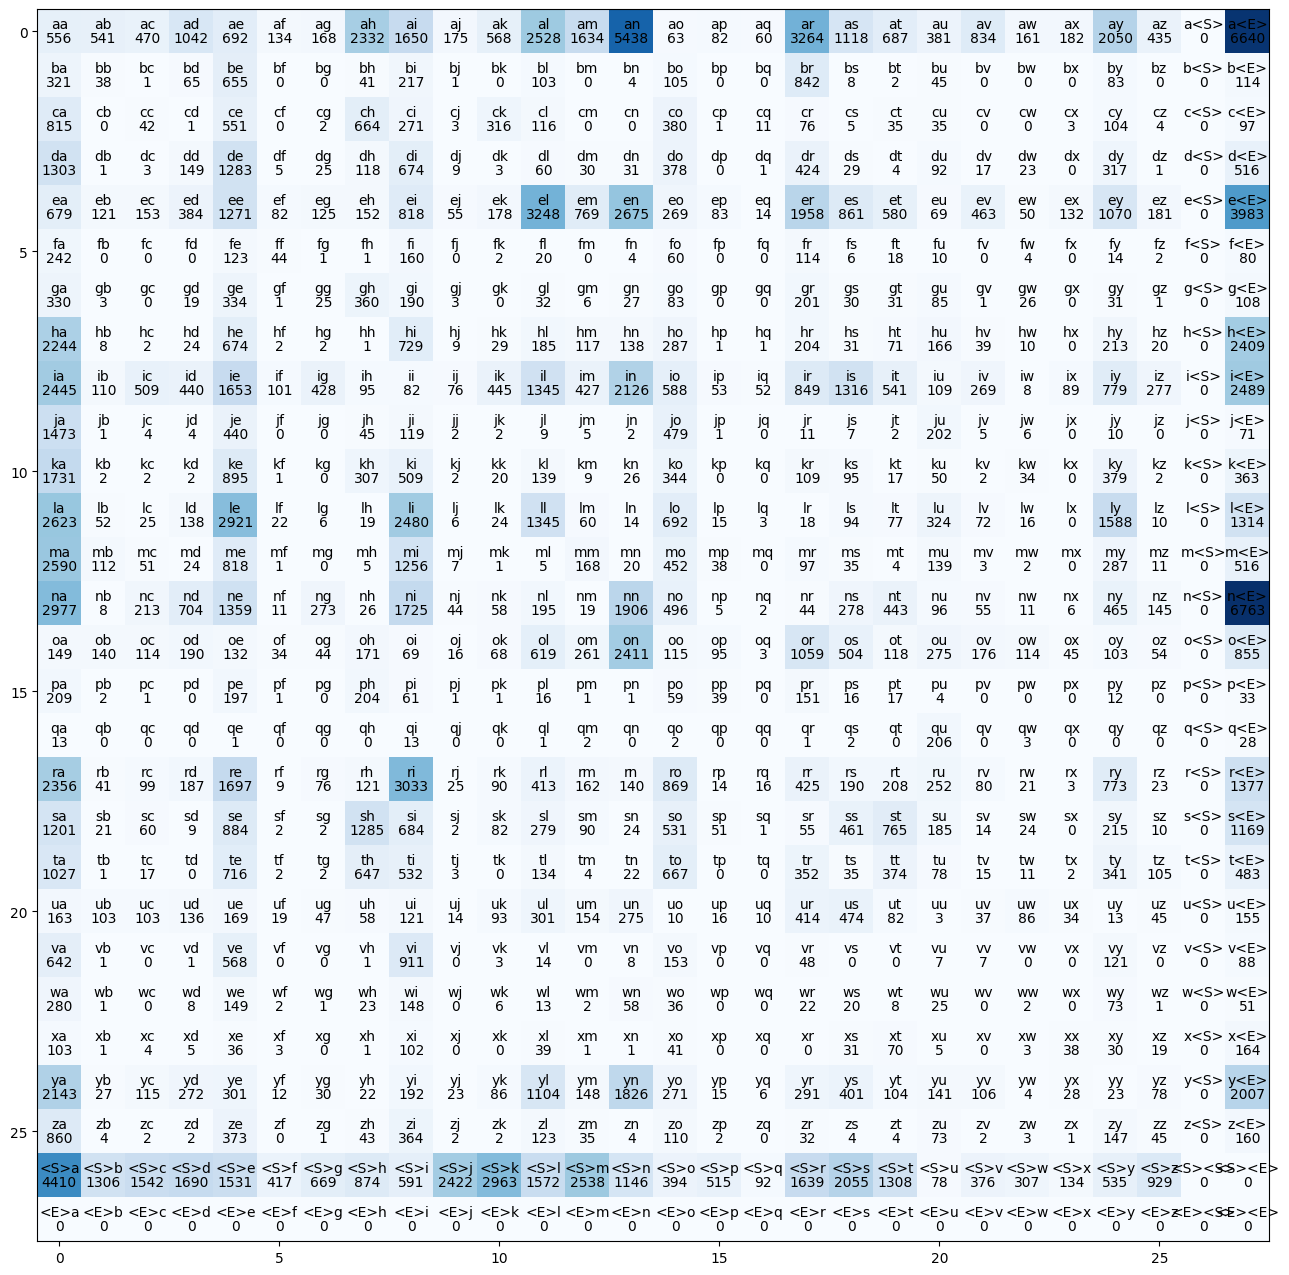

In [8]:
# visualize this matrix
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = "Blues")
for i in range(28):
    for j in range(28):
        # character strings
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        # bigram counts (.item() converts tensor to int)
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "black")
plt.show()

### 2.1- Fixing zero row and column problem

Notice we have empty `row` and `column` for `<E>` and `<S>` tokens respectively

We will solve that by replacing both of them with `.` token as follows:


``` python
# make a list of characters (a -> z)
chars = sorted(list(set("".join(words))))
# make a dictionary of character to index

stoi = {ch: i for (i, ch) in enumerate(chars)}
# remove theses tokens from the dictionary
```
<strike>

```python
stoi["<S>"] = len(chars)
stoi["<E>"] = len(chars) + 1
```
</strike>

```python
# and add this token
stoi["."] = len(chars)
# make a dictionary of index to character
itos = {i: ch for (ch, i) in stoi.items()}
```

This time we are taking `27` characters because we are using `.` character at the start and at the end of each name

In [14]:
N = torch.zeros(27, 27, dtype = torch.int32)

In [15]:
# make a list of characters (a -> z)
chars = sorted(list(set("".join(words))))

# make a dictionary of character to index
stoi = {ch: i + 1 for (i, ch) in enumerate(chars)}  # alphabet as key, integer as value
# 🆕 set start and end tokens to 0
stoi["."] = 0

# make a dictionary of index to character
itos = {i: ch for (ch, i) in stoi.items()} # integer as key, alphabet as value

In the below code we are counting out of total `27*27` pairs of bigrams, how many times each bigram appeared in our names dataset. Also note than we append `.` character at the start and at the end of each name.

In [16]:
# getting the Bigrams
for w in words:
    # add start and end tokens
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

Plotting the Counts

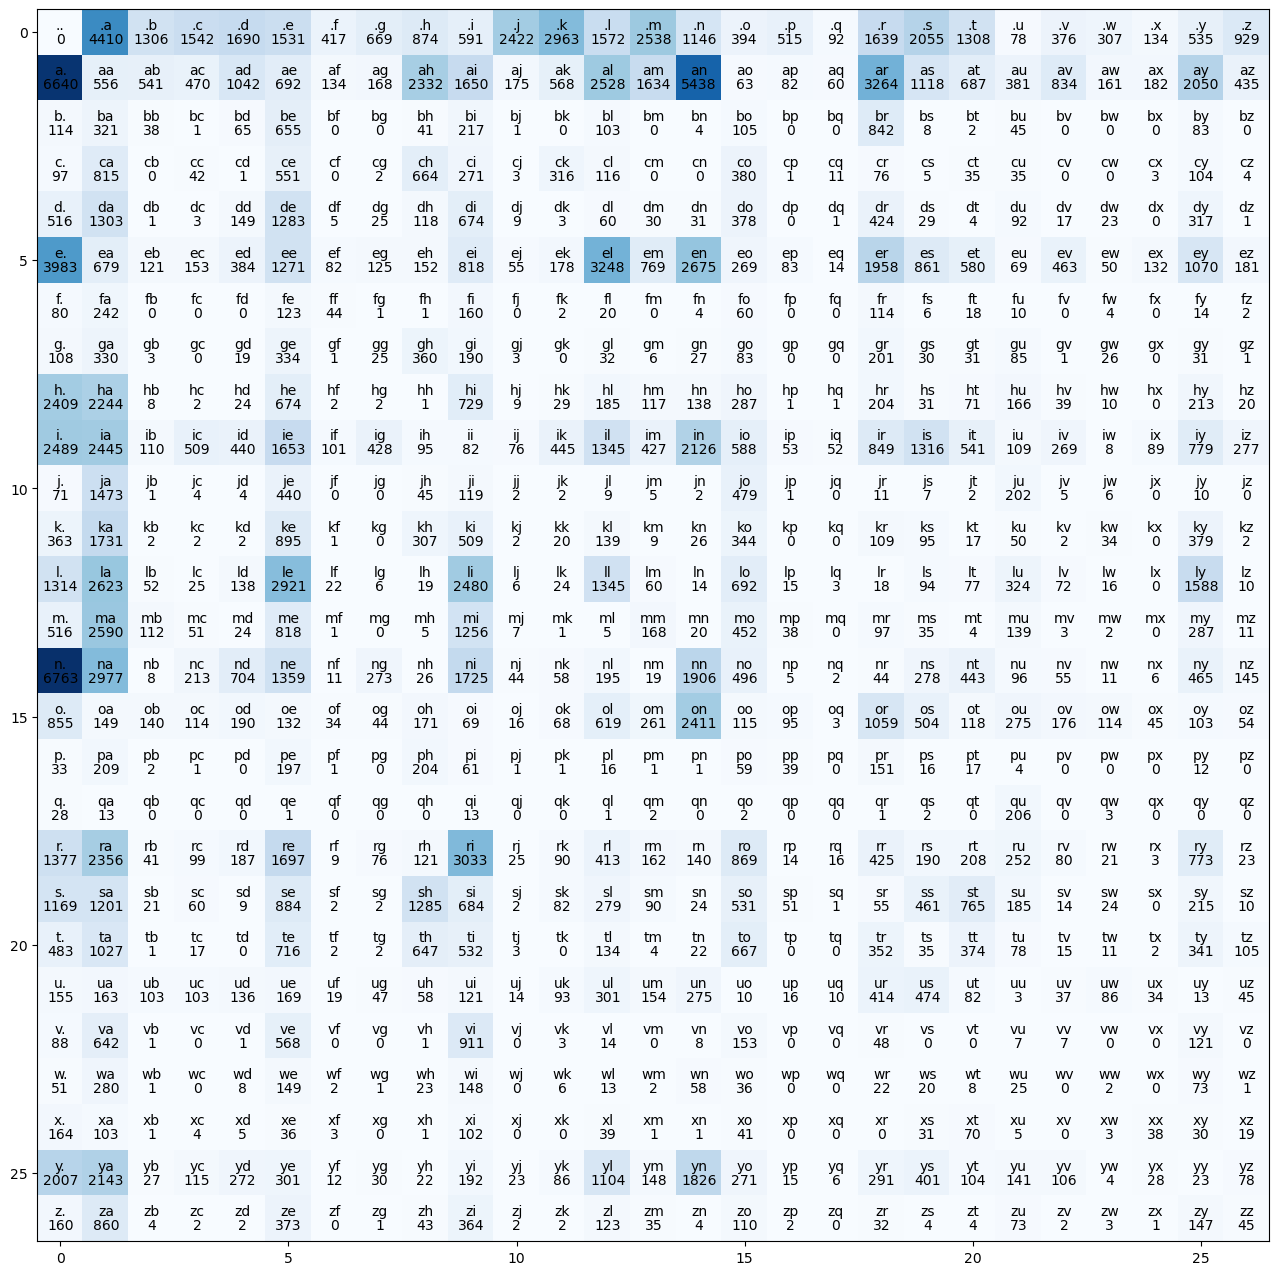

In [18]:
# visualize this matrix
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = "Blues")
for i in range(27):
    for j in range(27):
        # character strings
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        # bigram counts (.item() converts tensor to int)
        plt.text(j, i, N[i, j].item(), ha = "center", va = "top", color = "black")
plt.show()

Notice:
- `..` is `zero`, since we don't have `empty` words
- the first `row` is `start` words
- the first `column` is `end` words

## 3- Sampling from the model

In [21]:
# probability of the first character
p = N[0].float() / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Probability that any of the `27 characters` can be the first character is `1`

In [22]:
p.sum()

tensor(1.)

In [14]:
# probability 
p = N[0].float() / N[0].sum()

# generator is a seed for reproducibility
g = torch.Generator().manual_seed(2147483647)

# sample from the p distribution using the generator (I got different results from Andrej's idk why 🤔🤔)
ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
# convert index to character
itos[ix]

'j'

Using the `p` as probability distribution we will use it with `torch.multinomial` to draw samples from `p` based on the probability

`torch.multinomial` Returns a tensor where each row contains `num_samples` indices sampled from the multinomial probability distribution located in the corresponding row of tensor `p`.

So for each row of the character we draw using `torch.multinomial` we then calculate probability distribution for that row in the loop which undermine our performance

`torch.rand` Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)[0,1)

In [15]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float() / N[ix].sum()
        ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


### 3.1- Vectorization of Probabilities
Instead of calculating the probability distribution `p` everytime

#### 3.1.1- Broadcasting Example

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

---
Same shapes are always broadcastable (i.e. the above rules always hold)

In [24]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)

---
x and y are not broadcastable, because x does not have at least 1 dimension

In [25]:
x=torch.empty((0,))
y=torch.empty(2,2)

---

Can line up trailing dimensions
- x and y are broadcastable.
- 1st trailing dimension: both have size 1
- 2nd trailing dimension: y has size 1
- 3rd trailing dimension: x size == y size
- 4th trailing dimension: y dimension doesn't exist

In [26]:
x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)

---
x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [30]:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)

---

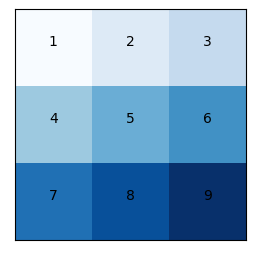

In [16]:
x = torch.tensor([[1,2,3],[4,5,6], [7,8,9]])
# visualize this matrix
plt.figure(figsize = (3, 3))
plt.imshow(x, cmap = "Blues")
for i in range(3):
    for j in range(3):
        # character strings
        chstr = x[i, j].item()
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        plt.xticks([])
        plt.yticks([])

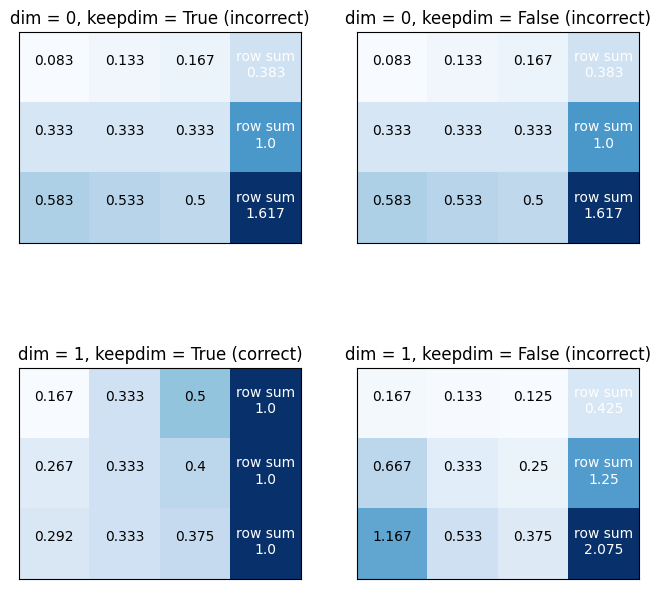

In [17]:
# visualize this matrix
x = torch.tensor([[1,2,3],[4,5,6], [7,8,9]])
xs = [
    torch.cat([(x / x.sum(dim = 0, keepdim = True)), (x / x.sum(dim = 0, keepdim = True)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by column ➡️ incorrect ❌
    torch.cat([(x / x.sum(dim = 0, keepdim = False)), (x / x.sum(dim = 0, keepdim = False)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by column ➡️ incorrect ❌
    torch.cat([(x / x.sum(dim = 1, keepdim = True)), (x / x.sum(dim = 1, keepdim = True)).sum(dim = 1, keepdim = True)], dim = 1), # normalize by row ➡️ correct (sum of each row == 1)✅
    torch.cat([(x / x.sum(dim = 1, keepdim = False)), (x / x.sum(dim = 1, keepdim = False)).sum(dim = 1, keepdim = True)], dim = 1) # normalize by column  ➡️ incorrect ❌
    ]

# visualize this matrices
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for n in range(4):
    axes[n // 2, n % 2].imshow(xs[n], cmap = "Blues")
    for i in range(3):
        for j in range(4):
            chstr = xs[n][i, j].item()
            if j == 3:
                axes[n // 2, n % 2].text(j, i - 0.25, f"row sum\n{round(chstr, 3)}", ha = "center", va = "top", color = "white")
            else:
                axes[n // 2, n % 2].text(j, i, round(chstr, 3), ha = "center", va = "bottom", color = "black")
            if n // 2 == 0 or not(n % 2 == 0):
                axes[n // 2, n % 2].set_title(f"dim = {n // 2}, keepdim = {not bool(n % 2)} (incorrect)")
            else:
                axes[n // 2, n % 2].set_title(f"dim = {n // 2}, keepdim = {not bool(n % 2)} (correct)")

            # remove ticks
            axes[n // 2, n % 2].set_xticks([])
            axes[n // 2, n % 2].set_yticks([])

#### 3.1.2- Vectorization

Wrong boradcasting Example:
```python
P = N.float() / N.sum(dim = 1, keepdim = False)
# Broadcasting:
# N.sum(dim = 1) ➡️ (27) ➡️ (1, 27) it became a row vector ❌
# N.float() ➡️ (27, 27)
# P ➡️ (27, 27)
# Wrong ❌ sum of each row != 1
```

In [32]:
P = N.float() / N.sum(dim = 1, keepdim = True)
# Broadcasting:
# N.sum(dim = 1, keepdim = True) ➡️ (27, 1)
# N.float() ➡️ (27, 27)
# P ➡️ (27, 27)
# Correct ✅ sum of each row == 1

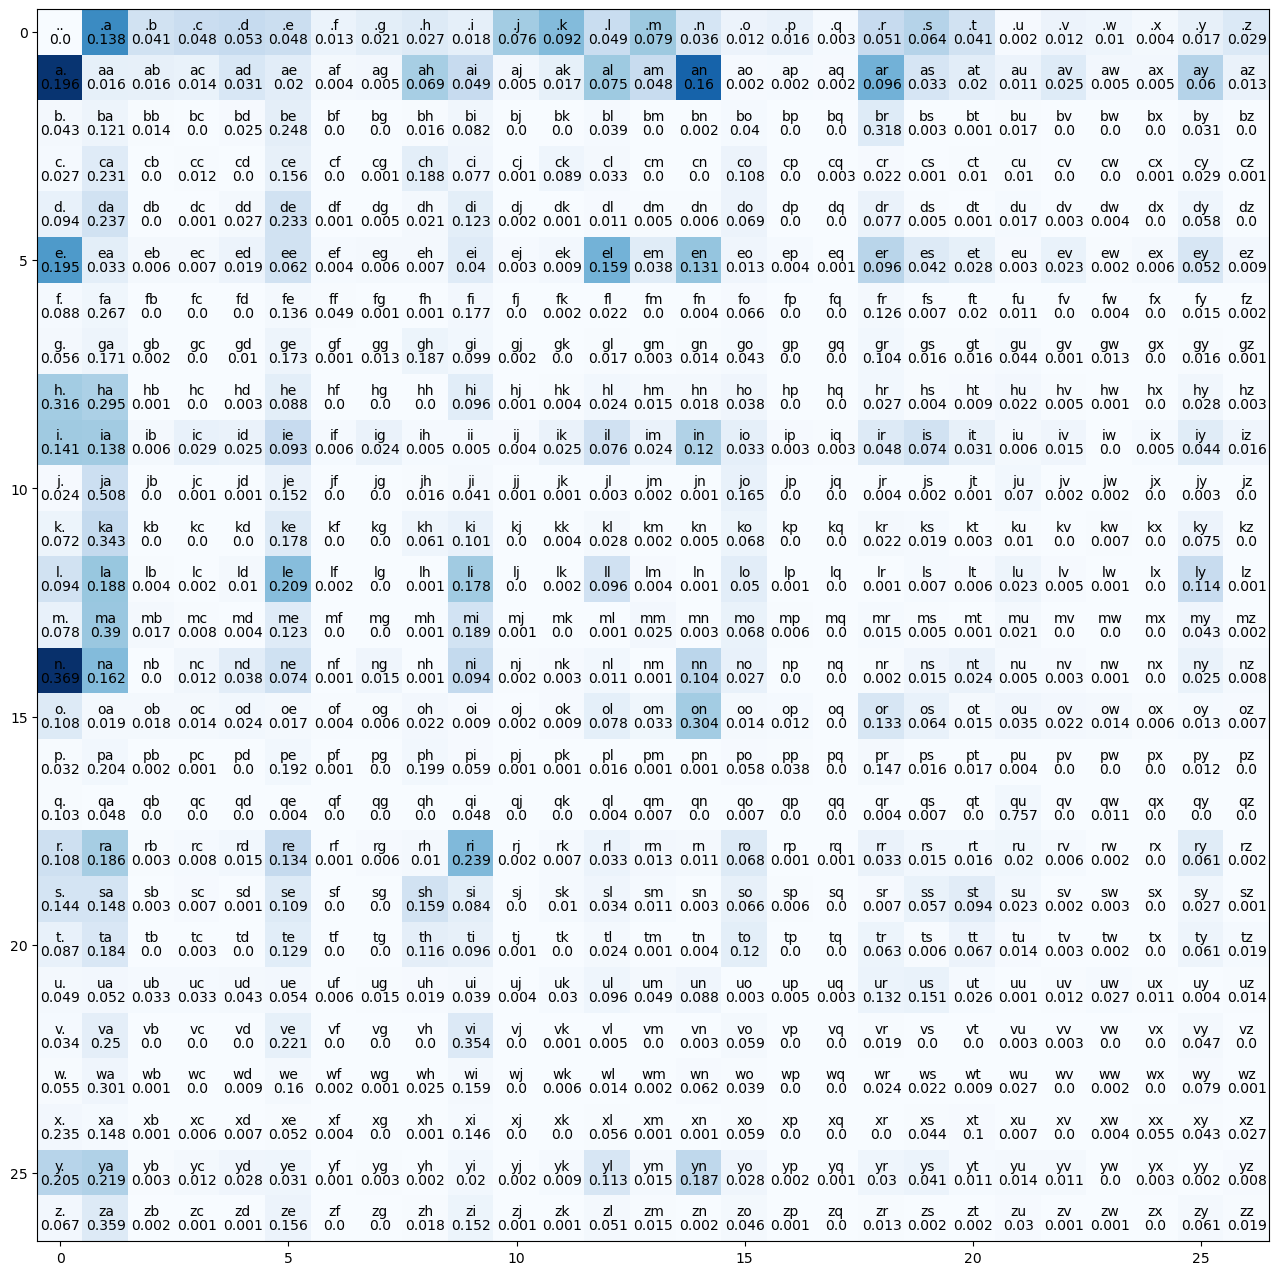

In [33]:
# visualize this probability matrix, it matches the bigram matrix
plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = "Blues")
for i in range(27):
    for j in range(27):
        # character strings
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = "black")
        # bigram counts (.item() converts tensor to int)
        plt.text(j, i, round(P[i, j].item(),3), ha = "center", va = "top", color = "black")
plt.show()

In [34]:
# sample from P
names = []
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    names.append("".join(out))
print(names)

['junide.', 'janasah.', 'p.', 'cony.', 'a.', 'nn.', 'kohin.', 'tolian.', 'juee.', 'ksahnaauranilevias.']


## 4- Training Loss: NLL

In [35]:
# getting the Bigrams
for w in words[:3]:
    # add start and end tokens
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # probability of each bigram
        # should be 1/27 = 0.037 for a uniform distribution i.e., random guessing
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2} -> {prob:.4f}")

.e -> 0.0478
em -> 0.0377
mm -> 0.0253
ma -> 0.3899
a. -> 0.1960
.o -> 0.0123
ol -> 0.0780
li -> 0.1777
iv -> 0.0152
vi -> 0.3541
ia -> 0.1381
a. -> 0.1960
.a -> 0.1377
av -> 0.0246
va -> 0.2495
a. -> 0.1960


We need a single number to combine all of these probabilities and measure the quality of the model ➡️ `Maximum Likelihood Estimation`

So, the `product of all probabilities` == the `sum of log of all probabilities` ➡️ should be as `high as possible`

Now when calculating the log likelihood if any of our probability is `0` our loss will be very much high. So what we will do we will add a very small amount to our `N` model so that each biagram will atleast be contributing a little to the output

In [38]:
# for smoothing (to prevent zero probabilities = log(0) = -inf)
P = (N+1).float() / N.sum(dim = 1, keepdim = True)

In language models, the negative log-likelihood (NLL) is commonly used as a loss function during training. The goal of a language model is to predict the probability distribution of the next word in a sequence given the context of preceding words.

The NLL measures the difference between the predicted probability distribution and the actual distribution of the next word. Minimizing the NLL during training encourages the model to assign higher probabilities to the correct words. Mathematically, maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood.

In [39]:
def nll_loss(input_list, verbose = False):
    log_likelihood = 0.0
    n = 0
    for w in input_list:
        # add start and end tokens
        chs = ["."] + list(w) + ["."]
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            # probability of each bigram
            # should be 1/27 = 0.037 for a uniform distribution i.e., random guessing
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            # higher the log probability (closer to 0) is better
            if verbose:
                print(f"{ch1}{ch2} -> {prob:.4f} {logprob:.4f}")

    # higher the log likelihood (closer to 0) is better
    print(f"log Likelihood: {log_likelihood}")

    # but in loss function lower is better, so we negate it
    nll = -log_likelihood
    print(f"Negative log likelihood: {nll}")

    # normalize it
    print(f"Normalized Negative log Likelihood: {(nll / n)}") # we need to minimize this

nll_loss(words[:5], verbose = True)

.e -> 0.0478 -3.0402
em -> 0.0377 -3.2780
mm -> 0.0254 -3.6713
ma -> 0.3901 -0.9414
a. -> 0.1960 -1.6297
.o -> 0.0123 -4.3956
ol -> 0.0781 -2.5492
li -> 0.1777 -1.7274
iv -> 0.0153 -4.1830
vi -> 0.3545 -1.0372
ia -> 0.1382 -1.9792
a. -> 0.1960 -1.6297
.a -> 0.1377 -1.9827
av -> 0.0246 -3.7033
va -> 0.2499 -1.3867
a. -> 0.1960 -1.6297
.i -> 0.0185 -3.9910
is -> 0.0744 -2.5983
sa -> 0.1483 -1.9086
ab -> 0.0160 -4.1355
be -> 0.2480 -1.3943
el -> 0.1591 -1.8383
ll -> 0.0964 -2.3389
la -> 0.1880 -1.6714
a. -> 0.1960 -1.6297
.s -> 0.0642 -2.7460
so -> 0.0656 -2.7237
op -> 0.0121 -4.4146
ph -> 0.1998 -1.6104
hi -> 0.0959 -2.3450
ia -> 0.1382 -1.9792
a. -> 0.1960 -1.6297
log Likelihood: -77.71862030029297
Negative log likelihood: 77.71862030029297
Normalized Negative log Likelihood: 2.4287068843841553


In [40]:
# check the loss of the sample names
nll_loss(names)

log Likelihood: -256.8978576660156
Negative log likelihood: 256.8978576660156
Normalized Negative log Likelihood: 3.471592664718628


for first training example: `.emma.`: the nll is `2.512`

for the first 5 training exampless: the average nll is `2.429`

# MLP Approach

## 1- Training set of bigrams (x,y)

In the below code `ys` is basically the shifted version of the `xs`. Which means training set will contains the previous character and the next character in the name

In [50]:
xs , ys = [], []

for w in words:
    # add start and end tokens
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

# convert to tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)

# first word: 5 separate examples (.emma ➡️ emma.)
print(xs[:5])
print(ys[:5])

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


## 2- One-hot encoding

`xenc = F.one_hot(xs, num_classes=27).float()`

- `F.one_hot(xs, num_classes=27)` converts the input sequence `xs` into a one-hot encoded representation. Each element in `xs` is replaced by a one-hot vector with a length of 27 (assuming 27 classes or tokens).
- `.float()` converts the one-hot encoded tensor to floating-point format, which is often required for further operations.

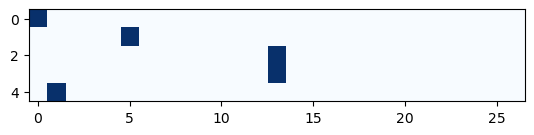

In [51]:
import torch.nn.functional as F
# you have to cast to float for one_hot (doesn't accept dtype parameter)
xenc = F.one_hot(xs, num_classes = 27).float()
plt.imshow(xenc[:5], cmap = "Blues")

## 3- Define the network

### 3.1- One Ouptut Neuron ➡️ Single outputs for each example

`xenc @ W`
- `@` is the matrix multiplication operator. It calculates the dot product of the one-hot encoded input `xenc` and the weight matrix `W`.
- `xenc @ W` represents the predicted log-counts for each class.

In [52]:
W = torch.randn((27,1))
# apply matrix multiplication (dot product): (5, 27) @ (27, 1) = (5, 1)
xenc[:5] @ W

tensor([[ 0.1194],
        [ 0.4822],
        [-0.4347],
        [-0.4347],
        [-0.8659]])

### 3.2 - 27 Output Neurons ➡️ 27 Output neurons for each character

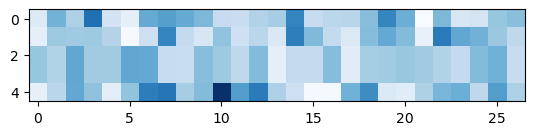

In [53]:
W = torch.randn((27,27), requires_grad = True)
# apply matrix multiplication (dot product): (5, 27) @ (27, 27) = (5, 27)
xenc[:5] @ W
plt.imshow(xenc[:5] @ W.detach().numpy(), cmap = "Blues")

## 4- Gradient Descent

In [60]:
W = torch.randn((27,27), requires_grad = True)

`counts = logits.exp()  # counts, equivalent to N`
- `logits.exp()` exponentiates the predicted log-counts, converting them into counts. This step is common in models where the output is interpreted as log-probabilities.

`probs = counts / counts.sum(1, keepdims=True)`
- `counts.sum(1, keepdims=True)` computes the sum of counts along the second dimension, ensuring that the result has the same shape as `counts`.
- `probs` is the probability distribution over the classes for the next character, obtained by normalizing the counts.

`loss = -probs[torch.arange(5), ys[:5]].log().mean()`
- The above equation computes the negative log-likelihood loss for the first five names in the dataset. It selects the log-probabilities corresponding to the true labels `ys` and computes their negative mean.

In [61]:
# forward pass

# log-counts
logits = xenc @ W 
# exp them ➡️ counts
counts = logits.exp()
# convert them into probabilities
probs = counts / counts.sum(dim = 1, keepdim = True)

# # the previous 3 lines can be replaced by:
# probs = F.softmax(logits, dim = 1)

loss = - probs[torch.arange(5), ys[:5]].log().mean()

In [59]:
loss.item()

3.7999870777130127

- `W.grad = None` initializes the gradient of the weight matrix to zero before computing the backward pass.
- `loss.backward()` computes the gradients of the loss with respect to the parameters using backpropagation.

```python
W -= 0.1 * W.grad
```

- This performs a gradient descent update. It subtracts a multiple of the gradient from the current weight values to update them.
- The learning rate is represented by the value `-0.1`. The negative sign indicates that it's a gradient descent step.

In [48]:
# backward pass
# set gradients to zero
W.grad = None
loss.backward()

# update weights
with torch.no_grad():
    W -= 0.1 * W.grad

xs[:5]=tensor([ 0,  5, 13, 13,  1])
ys[:5]=tensor([ 5, 13, 13,  1,  0])


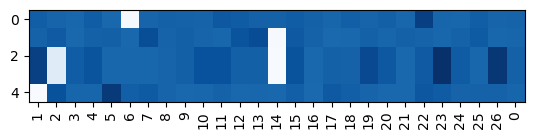

In [49]:
print(f"{xs[:5]=}")
print(f"{ys[:5]=}")
# The effect of all gradients are positive (increasing the loss) except for the correct one is negative (decreasing the loss)
plt.imshow(W.grad.detach().numpy()[xs[:5]], cmap = "Blues")
plt.xticks(range(27), itos, rotation = 90);

## 5- Combine the forward and backward pass into a single function

In [34]:
W = torch.randn((27,27), requires_grad = True)

In [35]:
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    counts = torch.exp(logits)
    probs = counts / counts.sum(dim = 1, keepdim = True)
    
    # loss
    loss = - probs[torch.arange(len(xs)), ys].log().mean()
    # add regularization
    loss += 0.1 * W.pow(2).mean()

    print(f"{k}: {loss.item():.4f}")

    # backward pass
    W.grad = None
    loss.backward()

    # update weights
    with torch.no_grad():
        W -= 50 * W.grad

0: 3.8776
1: 3.5022
2: 3.2583
3: 3.1035
4: 2.9996
5: 2.9234
6: 2.8669
7: 2.8243
8: 2.7914
9: 2.7653
10: 2.7441
11: 2.7267
12: 2.7120
13: 2.6995
14: 2.6887
15: 2.6793
16: 2.6710
17: 2.6637
18: 2.6573
19: 2.6515
20: 2.6463
21: 2.6417
22: 2.6375
23: 2.6338
24: 2.6304
25: 2.6273
26: 2.6245
27: 2.6220
28: 2.6197
29: 2.6176
30: 2.6156
31: 2.6139
32: 2.6122
33: 2.6107
34: 2.6093
35: 2.6080
36: 2.6068
37: 2.6057
38: 2.6046
39: 2.6037
40: 2.6028
41: 2.6019
42: 2.6011
43: 2.6004
44: 2.5996
45: 2.5990
46: 2.5984
47: 2.5978
48: 2.5972
49: 2.5967
50: 2.5962
51: 2.5957
52: 2.5953
53: 2.5949
54: 2.5945
55: 2.5941
56: 2.5937
57: 2.5934
58: 2.5931
59: 2.5928
60: 2.5925
61: 2.5922
62: 2.5919
63: 2.5917
64: 2.5915
65: 2.5912
66: 2.5910
67: 2.5908
68: 2.5906
69: 2.5904
70: 2.5903
71: 2.5901
72: 2.5899
73: 2.5898
74: 2.5896
75: 2.5895
76: 2.5894
77: 2.5892
78: 2.5891
79: 2.5890
80: 2.5889
81: 2.5888
82: 2.5887
83: 2.5886
84: 2.5885
85: 2.5884
86: 2.5883
87: 2.5882
88: 2.5882
89: 2.5881
90: 2.5880
91: 2.588

We are expecting loss similar to the training example (about 2.5)

## 6- Sampling from the model

Now to get sample from the model we start from the `0` as index which is `.` character and pass it to our model and use `torch.multinomial` to draw sample from the distribution calculated by the last layer of our nerual network model

In [36]:
# sample from P
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        # previosly we used P[ix]
        p = P[ix]

        # now we use the softmax of the logits
        # xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        # logits = xenc @ W
        # counts = torch.exp(logits)
        # p = counts / counts.sum(dim = 1, keepdim = True)

        ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [37]:
# sample from MLP
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        # previosly we used P[ix]
        # p = P[ix]

        # now we use the softmax of the logits
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
        logits = xenc @ W
        counts = torch.exp(logits)
        p = counts / counts.sum(dim = 1, keepdim = True)

        ix = torch.multinomial(p, num_samples = 1 , replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janaqah.
p.
cfay.
a.
nn.
kohin.
tolian.
jgee.
ksahnaauvinilevias.


The results are `the same`, since we're using the `same model` with the same loss

`W` is the `log counts` (estimated before from the bigram model)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()